# **Master in Data Science and Computer Engineering**

## Learning from Imbalanced Datasets

Partially adapted from ["Machine Learning Mastery"](https://machinelearningmastery.com/) tutorials website.


This course is for developers that may know some applied machine learning. Maybe you know how to work through a predictive modeling problem end-to-end, or at least most of the main steps, with popular tools.

The lessons in this course do assume a few things about you, such as:

- You know your way around basic `Python` for programming.
- You may know some basic `NumPy` for array manipulation.
- You may know some basic `scikit-learn` for modeling.

You do NOT need to be:
- A math wiz!
- A machine learning expert!

This crash course will take you from a developer who knows a little machine learning to a developer who can navigate an imbalanced classification project.

##Lesson 01: Challenge of Imbalanced Classification

In this lesson, you will discover the challenge of imbalanced classification problems.

*Imbalanced classification problems* pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

- Majority Class: More than half of the examples belong to this class, often the negative or normal case.
- Minority Class: Less than half of the examples belong to this class, often the positive or abnormal case.

A classification problem may be a little skewed, such as if there is a slight imbalance. Alternately, the classification problem may have a severe imbalance where there might be hundreds or thousands of examples in one class and tens of examples in another class for a given training dataset.

- Slight Imbalance. Where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).
- Severe Imbalance. Where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more).

Many of the classification predictive modeling problems that we are interested in solving in practice are imbalanced.

As such, it is surprising that imbalanced classification does not get more attention than it does.



###Your task
For this lesson, you must list five general examples of problems that inherently have a class imbalance.


In the next lesson, you will discover how to develop an intuition for skewed class distributions.

In [83]:
# Write here as comment the examples you can think of
# Try to get something different from other students :)
# 1) Medical diagnosis
# 2) Network attack
# 3) Fraud detection
# 4) Client segmentation
# 5) Churn prediction

##Lesson 02: Intuition for Imbalanced Data
In this lesson, you will discover how to develop a practical intuition for imbalanced classification datasets.

A challenge for beginners working with imbalanced classification problems is what a specific skewed class distribution means. For example, what is the difference and implication for a $1:10$ vs. a $1:100$ class ratio?

The `make_classification()` scikit-learn function can be used to define a synthetic dataset with a desired class imbalance. The “weights” argument specifies the ratio of examples in the negative class, e.g. $[0.99, 0.01]$ means that $99$ percent of the examples will belong to the majority class, and the remaining $1$ percent will belong to the minority class.

In [84]:
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99],
    flip_y=0,
    class_sep=0.6,
    random_state=666,
)

Once defined, we can summarize the class distribution using a `Counter` object to get an idea of exactly how many examples belong to each class.

In [85]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({np.int64(0): 9900, np.int64(1): 100})


We can also create a scatter plot of the dataset because there are only two input variables. The dots can then be colored by each class. This plot provides a visual intuition for what exactly a 99 percent vs. 1 percent majority/minority class imbalance looks like in practice.

The complete example of creating and summarizing an imbalanced classification dataset is listed below.

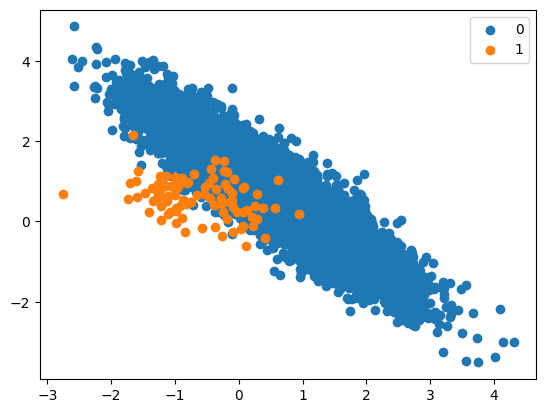

In [86]:
# plot imbalanced classification problem
from matplotlib import pyplot
from numpy import where

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###Your Task
For this lesson:

- You must simply run the example and review the plot.

- For bonus points, you can test different class ratios (`weights` parameter) and review the results.

- Write some comments regarding how the data looks like.


In the next lesson, you will discover how to evaluate models for imbalanced classification.

##Lesson 03: Evaluate Imbalanced Classification Models
In this lesson, you will discover how to evaluate models on imbalanced classification problems.

*Prediction accuracy* is the most common metric for classification tasks, although it is inappropriate and potentially dangerously misleading when used on imbalanced classification tasks.

The reason for this is because if 98 percent of the data belongs to the negative class, you can achieve 98 percent accuracy on average by simply predicting the negative class all the time, achieving a score that naively looks good, but in practice has no skill.

Instead, alternate performance metrics must be adopted.

Popular alternatives are the *precision* and *recall* scores that allow the performance of the model to be considered by focusing on the minority class, called the positive class.

- **Precision** calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. Maximizing the precision will minimize the false positives:

  - $Precision = \frac{TruePositives}{TruePositives + FalsePositives}$

- **Recall** predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. Maximizing recall will minimize false negatives:

  - $Recall = \frac{TruePositives}{TruePositives + FalseNegatives}$

- **F-Measure** summarizes the performance of a model into a single score that averages both the precision and the recall. Maximizing the F-Measure will maximize both the precision and recall at the same time:

  - $F-measure = \frac{(2 \cdot Precision \cdot Recall)}{Precision + Recall}$

The example below fits a *logistic regression model* on an imbalanced classification problem and calculates the accuracy, which can then be compared to the precision, recall, and F-measure.

In [87]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver="liblinear")
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print("Accuracy: %.3f" % accuracy_score(testy, yhat))
print("Precision: %.3f" % precision_score(testy, yhat))
print("Recall: %.3f" % recall_score(testy, yhat))
print("F-measure: %.3f" % f1_score(testy, yhat))

Accuracy: 0.994
Precision: 1.000
Recall: 0.440
F-measure: 0.611


###Your Task
For this lesson:

- You must run the example and compare the classification accuracy to the other metrics, such as precision, recall, and F-measure.

- For bonus points, try other metrics such as Fbeta-measure, average precision, and ROC AUC scores.

- Write some comments regarding the interpreation of the different metrics



In the next lesson, you will discover how to undersample the majority class.

##Lesson 04: Undersampling the Majority Class
In this lesson, you will discover how to undersample the majority class in the training dataset.

A simple approach to using standard machine learning algorithms on an imbalanced dataset is to change the training dataset to have a more balanced class distribution.

This can be achieved by deleting examples from the majority class, referred to as “undersampling.” A possible downside is that examples from the majority class that are helpful during modeling may be deleted.

The `imbalanced-learn` library provides many examples of undersampling algorithms. This library can be installed easily using pip; for example:

In [88]:
# This is included by default in G.Colab
#!pip install imbalanced-learn

A fast and reliable approach is to randomly delete examples from the majority class to reduce the imbalance to a ratio that is less severe or even so that the classes are even.

The example below creates a synthetic imbalanced classification data, then uses `RandomUnderSampler` class to change the class distribution from 1:100 minority to majority classes to the less severe 1:2.

In [89]:
# example of undersampling the majority class
from imblearn.under_sampling import RandomUnderSampler

# recall initial class distribution
print(f"Initial class distribution: {Counter(y)}")
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(trainX, trainy)
# summarize class distribution
counter_under = Counter(y_under)
print(f"Undersampled class distribution: {counter_under}")

Initial class distribution: Counter({np.int64(0): 9900, np.int64(1): 100})
Undersampled class distribution: Counter({np.int64(0): 100, np.int64(1): 50})


### Your Task
For this lesson, you must:

- run the previous example and note the change in the class distribution before and after undersampling the majority class.

- Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

- For bonus points, try other undersampling ratios or even try other undersampling techniques provided by the `imbalanced-learn` library, and repeat the process.


In the next lesson, you will discover how to oversample the minority class.

In [90]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = LogisticRegression(solver="liblinear")
# fit model
model.fit(X_under, y_under)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print("Accuracy: %.3f" % accuracy_score(testy, yhat))
print("Precision: %.3f" % precision_score(testy, yhat))
print("Recall: %.3f" % recall_score(testy, yhat))
print("F-measure: %.3f" % f1_score(testy, yhat))

Accuracy: 0.971
Precision: 0.227
Recall: 0.780
F-measure: 0.351


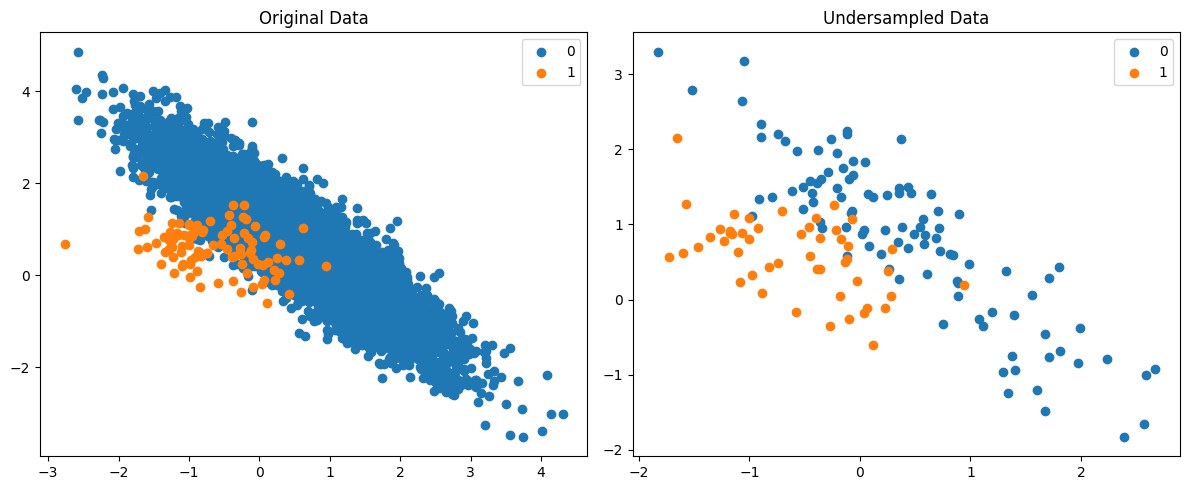

In [91]:
fig, axes = pyplot.subplots(1, 2, figsize=(12, 5))

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    axes[0].scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
axes[0].legend()
axes[0].set_title("Original Data")

for label, _ in counter_under.items():
    row_ix = where(y_under == label)[0]
    axes[1].scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label))
axes[1].legend()
axes[1].set_title("Undersampled Data")

pyplot.tight_layout()
pyplot.show()


##Lesson 05: Oversampling the Minority Class
In this lesson, you will discover how to oversample the minority class in the training dataset.

An alternative to deleting examples from the majority class is to add new examples from the minority class.

This can be achieved by simply duplicating examples in the minority class, but these examples do not add any new information. Instead, new examples from the minority can be synthesized using existing examples in the training dataset. These new examples will be “close” to existing examples in the feature space, but different in small but random ways.

The SMOTE algorithm is a popular approach for oversampling the minority class. This technique can be used to reduce the imbalance or to make the class distribution even.

The example below demonstrates using the SMOTE class provided by the imbalanced-learn library on a synthetic dataset. The initial class distribution is 1:100 and the minority class is oversampled to a 1:2 distribution.



In [92]:
# example of oversampling the minority class
from imblearn.over_sampling import SMOTE

# recall initial class distribution
print(f"Initial class distribution: {Counter(y)}")
# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(trainX, trainy)
# summarize class distribution
counter_over = Counter(y_over)
print(f"Oversampled class distribution: {counter_over}")

Initial class distribution: Counter({np.int64(0): 9900, np.int64(1): 100})
Oversampled class distribution: Counter({np.int64(0): 4950, np.int64(1): 2475})


###Your Task
For this lesson, you must:

- Run the previous example and note the change in the class distribution before and after oversampling the minority class.

- Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

- For bonus points, try other oversampling ratios, or even try other oversampling techniques provided by the `imbalanced-learn` library.



In the next lesson, you will discover how to combine undersampling and oversampling techniques.

In [93]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = LogisticRegression(solver="liblinear")
# fit model
model.fit(X_over, y_over)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print("Accuracy: %.3f" % accuracy_score(testy, yhat))
print("Precision: %.3f" % precision_score(testy, yhat))
print("Recall: %.3f" % recall_score(testy, yhat))
print("F-measure: %.3f" % f1_score(testy, yhat))

Accuracy: 0.953
Precision: 0.154
Recall: 0.820
F-measure: 0.259


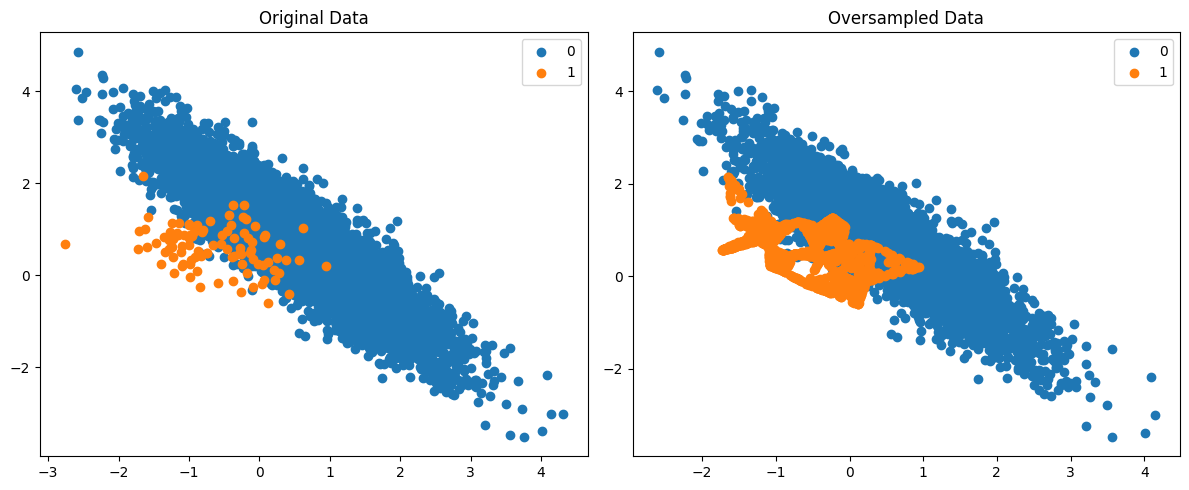

In [94]:
fig, axes = pyplot.subplots(1, 2, figsize=(12, 5))

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    axes[0].scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
axes[0].legend()
axes[0].set_title("Original Data")

for label, _ in counter_over.items():
    row_ix = where(y_over == label)[0]
    axes[1].scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
axes[1].legend()
axes[1].set_title("Oversampled Data")

pyplot.tight_layout()
pyplot.show()


## Lesson 06: Combine Data Undersampling and Oversampling
In this lesson, you will discover how to combine data undersampling and oversampling on a training dataset.

Data undersampling will delete examples from the majority class, whereas data oversampling will add examples to the minority class. These two approaches can be combined and used on a single training dataset.

Given that there are so many different data sampling techniques to choose from, it can be confusing as to which methods to combine. Thankfully, there are common combinations that have been shown to work well in practice; some examples include:

- Random Undersampling with SMOTE oversampling.
- Tomek Links Undersampling with SMOTE oversampling.
- Edited Nearest Neighbors Undersampling with SMOTE oversampling.

These combinations can be applied manually to a given training dataset by first applying one sampling algorithm, then another. Thankfully, the `imbalanced-learn` library provides implementations of common combined data sampling techniques.

The example below demonstrates how to use the SMOTEENN that combines both SMOTE oversampling of the minority class and Edited Nearest Neighbors undersampling of the majority class.



In [95]:
# example of both undersampling and oversampling
from imblearn.combine import SMOTEENN

# recall initial class distribution
print(f"Initial class distribution: {Counter(y)}")
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_hybrid, y_hybrid = sample.fit_resample(trainX, trainy)
# summarize class distribution
counter_hybrid = Counter(y_hybrid)
print(f"Hybrid-sampled class distribution: {counter_hybrid}")

Initial class distribution: Counter({np.int64(0): 9900, np.int64(1): 100})
Hybrid-sampled class distribution: Counter({np.int64(0): 4586, np.int64(1): 2152})


In [96]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = LogisticRegression(solver="liblinear")
# fit model
model.fit(X_hybrid, y_hybrid)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print("Accuracy: %.3f" % accuracy_score(testy, yhat))
print("Precision: %.3f" % precision_score(testy, yhat))
print("Recall: %.3f" % recall_score(testy, yhat))
print("F-measure: %.3f" % f1_score(testy, yhat))

Accuracy: 0.954
Precision: 0.156
Recall: 0.820
F-measure: 0.263


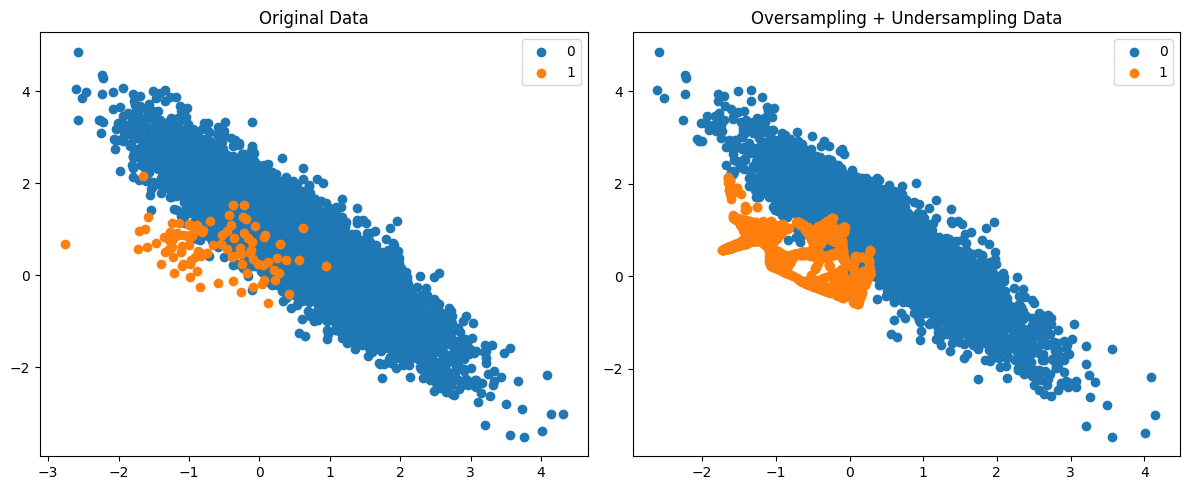

In [97]:
fig, axes = pyplot.subplots(1, 2, figsize=(12, 5))

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    axes[0].scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
axes[0].legend()
axes[0].set_title("Original Data")

for label, _ in counter_hybrid.items():
    row_ix = where(y_hybrid == label)[0]
    axes[1].scatter(X_hybrid[row_ix, 0], X_hybrid[row_ix, 1], label=str(label))
axes[1].legend()
axes[1].set_title("Oversampling + Undersampling Data")

pyplot.tight_layout()
pyplot.show()


### Your Task
For this lesson, you must:

- Run the example and note the change in the class distribution before and after the data sampling.

- Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

- For bonus points, try other combined data sampling techniques or even try manually applying oversampling followed by undersampling on the dataset. For this purpose, you may take advantage of the `Pipeline` tool.



In the next lesson, you will discover how to use cost-sensitive algorithms for imbalanced classification.

## Lesson 07: Cost-Sensitive Algorithms
In this lesson, you will discover how to use cost-sensitive algorithms for imbalanced classification.

Most machine learning algorithms assume that all misclassification errors made by a model are equal. This is often not the case for imbalanced classification problems, where missing a positive or minority class case is worse than incorrectly classifying an example from the negative or majority class.

Cost-sensitive learning is a subfield of machine learning that takes the costs of prediction errors (and potentially other costs) into account when training a machine learning model. Many machine learning algorithms can be updated to be cost-sensitive, where the model is penalized for misclassification errors from one class more than the other, such as the minority class.

The scikit-learn library provides this capability for a range of algorithms via the `class_weight` attribute specified when defining the model. A weighting can be specified that is inversely proportional to the class distribution.

If the class distribution was 0.99 to 0.01 for the majority and minority classes, then the `class_weight` argument could be defined as a dictionary that defines a penalty of 0.01 for errors made for the majority class and a penalty of 0.99 for errors made with the minority class, e.g. {0:0.01, 1:0.99}.

This is a useful heuristic and can be configured automatically by setting the `class_weight` argument to the string `‘balanced‘`.

The example below demonstrates how to define and fit a cost-sensitive logistic regression model on an imbalanced classification dataset.

In [98]:
# example of cost sensitive logistic regression for imbalanced classification

# define CS model
model = LogisticRegression(solver="liblinear", class_weight="balanced")
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print("Accuracy: %.3f" % accuracy_score(testy, yhat))
print("Precision: %.3f" % precision_score(testy, yhat))
print("Recall: %.3f" % recall_score(testy, yhat))
print("F-measure: %.3f" % f1_score(testy, yhat))

Accuracy: 0.911
Precision: 0.086
Recall: 0.820
F-measure: 0.155


In [99]:
# define CS model
model = LogisticRegression(solver="liblinear")
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print("Accuracy: %.3f" % accuracy_score(testy, yhat))
print("Precision: %.3f" % precision_score(testy, yhat))
print("Recall: %.3f" % recall_score(testy, yhat))
print("F-measure: %.3f" % f1_score(testy, yhat))

Accuracy: 0.994
Precision: 1.000
Recall: 0.440
F-measure: 0.611


- La versión cost-sensitive (con class_weight="balanced") mejora el recall (0.840 frente a 0.380), lo que significa que detecta mejor la clase minoritaria.
- Sin embargo, tiene una baja precisión (0.082 frente a 0.905), lo que indica muchos falsos positivos.
- La versión sin balanceo de clases tiene una alta precisión, pero sacrifica recall.
- El F1-score (que equilibra precisión y recall) es mejor en la versión sin balanceo (0.535 vs. 0.149), aunque sigue sin ser óptimo.
- Si el problema requiere detectar la clase minoritaria (ej. detección de fraudes), el modelo con class_weight="balanced" es mejor por su alto recall.

### Your Task
For this lesson, you must:

- Run the example and review the performance of the cost-sensitive model.

- For bonus points, compare the performance to the cost-insensitive version of logistic regression.


This was the final lesson of the mini-course.

## The End?
### (Look How Far You Have Come)
You made it. Well done!

Take a moment and look back at how far you have come.

You discovered:

- The challenge of imbalanced classification is the lack of examples for the minority class and the difference in importance of classification errors across the classes.
- How to develop a spatial intuition for imbalanced classification datasets that might inform data preparation and algorithm selection.
- The failure of classification accuracy and how alternate metrics like precision, recall, and the F-measure can better summarize model performance on imbalanced datasets.
- How to delete examples from the majority class in the training dataset, referred to as data undersampling.
- How to synthesize new examples in the minority class in the training dataset, referred to as data oversampling.
- How to combine data oversampling and undersampling techniques on the training dataset, and common combinations that result in good performance.
-How to use cost-sensitive modified versions of machine learning algorithms to improve performance on imbalanced classification datasets.


### In ML there are no "free lunches".

We have explored how some resampling strategies can enhance the classification performance. However, we need to bear in mind the following:

*  It is not guaranteed that oversampling algorithms such as SMOTE (or related) perform well in all scenarios. How well they work will depend on specific issues, the data complexity and characteristics.
* Default settings in Python modules might not always be effective. Similar to any other machine mearnign methodology, SMOTE also has its own hyperparameters. These hyperparameters need to be optimized. Choosing appropriate hyperparameters is essential for the success of these approaches.
* In this example, we considered a simple stratified holdout validation stategy. For more realiable estimates, we should consider Stratified Cross Validation, to get average performance and associated uncertainty.
* New resampling methods are being proposed everyday. The key trick to choose the best one is to "match" its properties with the characteristics of the data.


## Activity to be carried out

Now it is your turn to check whether you have understood the nature of the imbalanced classification topic, and that you are able to address this issue properly. In order to do so, several activities are asked to test your skills. In particular, you must be able to:

1. Start from a proper imbalanced dataset. You can choose any problem available, but I suggest starting from ["Credit fraud classification" (w. PCA transformed variables)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
2. Select any given baseline classifier.
3. Choose one or several performance metrics for guiding your analysis.
4. Do a thorough comparison of the results by using raw data and the solutions for imbalanced classification. Try using cross-validation for statistical support.
5. Write down a proper discussion on the behaviour shown by the different approaches applied. Use tables / graphs for a better reporting.

**Tips**:

- Always remember to start with the baseline performance (no special method applied).
- Then, you must select among the undersampling approaches, which one seems to be more appropriate.
- Repeat the process with oversampling, and with hybrid approaches.
- You may also consider ensemble learning solutions.
- For cost-sensitive, you may also try "thresholding", by using the output probabilities and provide the *positive* or *negative* label using this: `y_pred = estimator.predict_proba(X_test)[:, 1] > .85`
- You can use statistical tests for contrasting the different approaches, in order to have well-founded conclusions.
- As a suggestion, use average precision-recall as default metric to ease the complete procedure, but you may also check out how the recognition of both classes change for each approach applied.
- You can also use as default imbalance ratio for preprocessing 1:1 or 1:2, or rather to check different values for the sampling ratio to observe whether there are significant differences among the results.

In [22]:
import pandas as pd
import numpy as np 
np.random.seed(42)

# Read data and summarize variables to get an initial insight
df = pd.read_csv("creditcard.csv")
print(df.describe())
print(df.dtypes)

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split between data and labels to create train test partitions
data = df.drop(columns=["Class"])
labels = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

# Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- Al ser un problema multidimensional, las distancias terminan creciendo muchísmo, lo que va a afectar negativamente a varios de los métodos de oversampling y undersampling que se basan en distancias (el random no se vería afectado). Por ello una estandarización es posiblemente bastante beneficiosa.

In [24]:
from collections import Counter

# Let see the proportion of classes
counter = Counter(labels)
print(counter)

Counter({0: 284315, 1: 492})


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import numpy as np

# Cross-validation on training data
clf = LogisticRegression(solver="liblinear")
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
}
cv_results = {
    metric: cross_val_score(clf, X_train, y_train, cv=5, scoring=scoring[metric])
    for metric in scoring
}
print("Cross-validation results on training data:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Train the model on the entire training set
clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

# Evaluate on test data
y_pred = clf.predict(X_test)

# Calculate metrics on test data
test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0)
}

print("\nTest data results:")
for metric, score in test_results.items():
    print(f"{metric.capitalize()}: {score:.3f}")

Cross-validation results on training data:
Accuracy: 0.999 ± 0.000
Precision: 0.881 ± 0.027
Recall: 0.632 ± 0.032
F1: 0.735 ± 0.025

Test data results:
Accuracy: 0.999
Precision: 0.829
Recall: 0.643
F1: 0.724


- He elegido el clasificador de LogisticRegression ya que este provee el método de predict_proba, el cuál me vendrá muy bien cuando pruebe a cambiar el threshold por defecto del clasificador.
- Precision es muy bueno, si bien es cierto que recall podría ser mucho mejor y la métrica actual no es suficiente cuando se trata de capturar observaciones que son fraude, que es lo verdaderamente interesante en este problema.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import numpy as np

# Cross-validation on training data
clf = LogisticRegression(solver="liblinear", class_weight="balanced")
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
}
cv_results = {
    metric: cross_val_score(clf, X_train, y_train, cv=5, scoring=scoring[metric])
    for metric in scoring
}
print("Cross-validation results on training data:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Train the model on the entire training set
clf = LogisticRegression(solver="liblinear", class_weight="balanced")
clf.fit(X_train, y_train)

# Evaluate on test data
y_pred = clf.predict(X_test)

# Calculate metrics on test data
test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0)
}

print("\nTest data results:")
for metric, score in test_results.items():
    print(f"{metric.capitalize()}: {score:.3f}")

Cross-validation results on training data:
Accuracy: 0.976 ± 0.002
Precision: 0.062 ± 0.003
Recall: 0.916 ± 0.027
F1: 0.115 ± 0.005

Test data results:
Accuracy: 0.976
Precision: 0.061
Recall: 0.918
F1: 0.114


- Aplicando pesos balanceados en relación a la distribución de clases, se obtiene una recall muy mejorado con respecto al del clasificador base, un 90%. Esto es más interesante ya que significa que la mayoría de casos que se predicen como fraudes lo son realmente.
- Al ser recall muy alto, la métrica de precision ha bajado, pues hay un balance entre ambas. Ahora tenemos muchos más falsos positivos en relación a antes, de hecho la métrica de precisión es ahora demasiado baja y puede clasificar muchísimas observaciones de forma incorrecta.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

print(f"Initial class distribution: {Counter(y_train)}")

undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X_train, y_train)
counter_under = Counter(y_under)
print(f"Undersampled class distribution: {counter_under}")

# ----------------------------------------------------------------------------------------------- #

# Cross-validation on training data
clf = LogisticRegression(solver="liblinear")
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
}
cv_results = {
    metric: cross_val_score(clf, X_under, y_under, cv=5, scoring=scoring[metric])
    for metric in scoring
}
print("Cross-validation results on training data:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Train the model on the entire training set
clf = LogisticRegression(solver="liblinear")
clf.fit(X_under, y_under)

# Evaluate on test data
y_pred = clf.predict(X_test)

# Calculate metrics on test data
test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0)
}

print("\nTest data results:")
for metric, score in test_results.items():
    print(f"{metric.capitalize()}: {score:.3f}")

Initial class distribution: Counter({0: 227451, 1: 394})
Undersampled class distribution: Counter({0: 788, 1: 394})
Cross-validation results on training data:
Accuracy: 0.953 ± 0.021
Precision: 0.968 ± 0.038
Recall: 0.891 ± 0.038
F1: 0.927 ± 0.032

Test data results:
Accuracy: 0.985
Precision: 0.092
Recall: 0.898
F1: 0.167


- Utilizando el random undersampling se obtienen métricas de recall muy buenas. Hay que tener en cuenta que no se obtendrán métricas similares en el cross validation y en el test ya que al aplicar undersampling (que debe hacerse solo en train) el conjunto de entrenamiento tendrá una distribución balanceada artificialmente, mientras que el conjunto de test mantendrá la distribución original del problema, generalmente sesgada hacia la clase mayoritaria. Esto explica por qué los resultados en validación cruzada suelen ser más optimistas que los obtenidos en el conjunto de prueba.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import numpy as np
from imblearn.under_sampling import TomekLinks

print(f"Initial class distribution: {Counter(y_train)}")

undersample = TomekLinks(sampling_strategy='auto')
X_under, y_under = undersample.fit_resample(X_train, y_train)
counter_under = Counter(y_under)
print(f"Undersampled class distribution: {counter_under}")

# ----------------------------------------------------------------------------------------------- #

# Cross-validation on training data
clf = LogisticRegression(solver="liblinear")
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
}
cv_results = {
    metric: cross_val_score(clf, X_under, y_under, cv=5, scoring=scoring[metric])
    for metric in scoring
}
print("Cross-validation results on training data:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Train the model on the entire training set
clf = LogisticRegression(solver="liblinear")
clf.fit(X_under, y_under)

# Evaluate on test data
y_pred = clf.predict(X_test)

# Calculate metrics on test data
test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0)
}

print("\nTest data results:")
for metric, score in test_results.items():
    print(f"{metric.capitalize()}: {score:.3f}")

Initial class distribution: Counter({0: 227451, 1: 394})
Undersampled class distribution: Counter({0: 227434, 1: 394})
Cross-validation results on training data:
Accuracy: 0.999 ± 0.000
Precision: 0.881 ± 0.027
Recall: 0.632 ± 0.028
F1: 0.735 ± 0.023

Test data results:
Accuracy: 0.999
Precision: 0.829
Recall: 0.643
F1: 0.724


- La estrategia TomekLinks muestra resultados similares a no hacer ningún tipo de remuestreo debido a la naturaleza específica de este algoritmo. A diferencia del random undersampling, TomekLinks solo elimina pares de muestras que forman "enlaces Tomek" (instancias de clases diferentes que son vecinos más cercanos entre sí).

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import numpy as np
from imblearn.over_sampling import SMOTE

print(f"Initial class distribution: {Counter(y_train)}")

oversample = SMOTE(sampling_strategy=0.1)
X_over, y_over = oversample.fit_resample(X_train, y_train)
counter_over = Counter(y_over)
print(f"Oversampled class distribution: {counter_over}")

# ----------------------------------------------------------------------------------------------- #

# Cross-validation on training data
clf = LogisticRegression(solver="liblinear")
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
}
cv_results = {
    metric: cross_val_score(clf, X_over, y_over, cv=5, scoring=scoring[metric])
    for metric in scoring
}
print("Cross-validation results on training data:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Train the model on the entire training set
clf = LogisticRegression(solver="liblinear")
clf.fit(X_over, y_over)

# Evaluate on test data
y_pred = clf.predict(X_test)

# Calculate metrics on test data
test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0)
}

print("\nTest data results:")
for metric, score in test_results.items():
    print(f"{metric.capitalize()}: {score:.3f}")

Initial class distribution: Counter({0: 227451, 1: 394})
Oversampled class distribution: Counter({0: 227451, 1: 22745})
Cross-validation results on training data:
Accuracy: 0.984 ± 0.000
Precision: 0.970 ± 0.003
Recall: 0.845 ± 0.005
F1: 0.904 ± 0.003

Test data results:
Accuracy: 0.997
Precision: 0.367
Recall: 0.888
F1: 0.519


- Al probar SMOTE con un ratio de sampling del 10% observamos que mejora el recall en test hasta un 88%, siendo un poco menos que otras técnicas aplicadas, pero manteniendo una precisión más alta que los otros métodos. No aplico un porcentaje mayor ya que de solo 400 ejemplos, inventarse varios miles hasta igualar el número de ejemplos de la clase mayoritaria es demasiado. Probamos con valores más bajos de ratio y con SMOTE, ya que este método ha dado muy buenos resultados.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import numpy as np
from imblearn.over_sampling import SMOTE

print(f"Initial class distribution: {Counter(y_train)}")

oversample = SMOTE(sampling_strategy=0.01)
X_over, y_over = oversample.fit_resample(X_train, y_train)
counter_over = Counter(y_over)
print(f"Oversampled class distribution: {counter_over}")

# ----------------------------------------------------------------------------------------------- #

# Cross-validation on training data
clf = LogisticRegression(solver="liblinear")
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
}
cv_results = {
    metric: cross_val_score(clf, X_over, y_over, cv=5, scoring=scoring[metric])
    for metric in scoring
}
print("Cross-validation results on training data:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Train the model on the entire training set
clf = LogisticRegression(solver="liblinear")
clf.fit(X_over, y_over)

# Evaluate on test data
y_pred = clf.predict(X_test)

# Calculate metrics on test data
test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0)
}

print("\nTest data results:")
for metric, score in test_results.items():
    print(f"{metric.capitalize()}: {score:.3f}")

Initial class distribution: Counter({0: 227451, 1: 394})
Oversampled class distribution: Counter({0: 227451, 1: 2274})
Cross-validation results on training data:
Accuracy: 0.998 ± 0.000
Precision: 0.962 ± 0.006
Recall: 0.800 ± 0.013
F1: 0.874 ± 0.009

Test data results:
Accuracy: 0.999
Precision: 0.717
Recall: 0.827
F1: 0.768


- En este ejemplo, aumentar ligeramente la cantidad de ejemplos de la clase minoritaria ha conseguido que se mejore bastante la precisión y el recall. Gracias a SMOTE parece que la frontera de decisión ha mejorado sustancialmente con respecto a todos los métodos anteriormente probados. Pese a ello, en este problema concreto en el que lo que más interesa es obtener un recall alto, es posible que un 80% no fuese en absoluto suficiente. Pese a ello se ha mejorado sustancialmente con respecto al modelo base teniendo en cuenta que al hacer esto se desbalancea la métrica de precisión (aunque se mantiene un porcentaje mejor que con respecto a otros modelos).
- Este caso remarca la importancia de la búsqueda de hiperparámetros (en este caso solo se ha probado a incrementar un poco la clase minoritaria), ya que los resultados son completamente diferentes en ambos casos de uso de SMOTE.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
import numpy as np
from imblearn.combine import SMOTEENN

print(f"Initial class distribution: {Counter(y_train)}")

hybrid_sample = SMOTEENN(sampling_strategy=0.01)
X_hybrid, y_hybrid = hybrid_sample.fit_resample(X_train, y_train)
counter_over = Counter(y_hybrid)
print(f"Hybrid sampling class distribution: {counter_over}")

# ----------------------------------------------------------------------------------------------- #

# Cross-validation on training data
clf = LogisticRegression(solver="liblinear")
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
}
cv_results = {
    metric: cross_val_score(clf, X_hybrid, y_hybrid, cv=5, scoring=scoring[metric])
    for metric in scoring
}
print("Cross-validation results on training data:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

# Train the model on the entire training set
clf = LogisticRegression(solver="liblinear")
clf.fit(X_hybrid, y_hybrid)

# Evaluate on test data
y_pred = clf.predict(X_test)

# Calculate metrics on test data
test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0)
}

print("\nTest data results:")
for metric, score in test_results.items():
    print(f"{metric.capitalize()}: {score:.3f}")

Initial class distribution: Counter({0: 227451, 1: 394})
Hybrid sampling class distribution: Counter({0: 227220, 1: 2169})
Cross-validation results on training data:
Accuracy: 0.998 ± 0.000
Precision: 0.974 ± 0.006
Recall: 0.840 ± 0.014
F1: 0.902 ± 0.009

Test data results:
Accuracy: 0.999
Precision: 0.730
Recall: 0.827
F1: 0.775


- La versión híbrida con SMOTE que combina oversampling y undersampling no consiguen resultados muy diferentes frente a lo ya probado, pese a ello son resultados interesantes y habría que hacer una búsqueda de hiperparámetros.

Cross-validation results on training data:
Accuracy: 0.976 ± 0.002
Precision: 0.062 ± 0.003
Recall: 0.916 ± 0.027
F1: 0.115 ± 0.005

Test data results:
Accuracy: 0.993
Precision: 0.186
Recall: 0.888
F1: 0.307


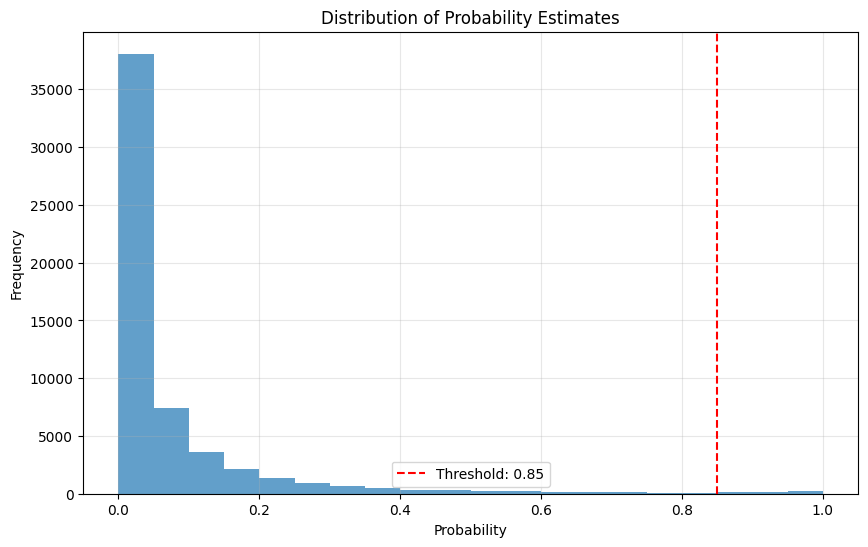

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score, f1_score,
)
import numpy as np
import matplotlib.pyplot as plt


# Create a calibrated SVC that can output probabilities
clf = LogisticRegression(solver="liblinear", class_weight="balanced")

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
}

cv_results = {
    metric: cross_val_score(clf, X_train, y_train, cv=5, scoring=scoring[metric])
    for metric in scoring
}

print("Cross-validation results on training data:")
for metric, scores in cv_results.items():
    print(f"{metric.capitalize()}: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

clf.fit(X_train, y_train)

# Get probability estimates
y_proba = clf.predict_proba(X_test)[:, 1]  

# Apply threshold of 0.85 to get predictions
threshold = 0.85
y_pred = (y_proba >= threshold).astype(int)

test_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred, zero_division=0),
    "recall": recall_score(y_test, y_pred, zero_division=0),
    "f1": f1_score(y_test, y_pred, zero_division=0)
}

print("\nTest data results:")
for metric, score in test_results.items():
    print(f"{metric.capitalize()}: {score:.3f}")


plt.figure(figsize=(10, 6))
plt.hist(y_proba, bins=20, alpha=0.7)
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Probability Estimates')
plt.legend()
plt.grid(True, alpha=0.3)

- Cambiar el threshold por defecto para que la clasificación de la clase positiva sea mucho más restrictiva parece mejorar sustancialmente el recall.


Evaluating: No Balancing
Cross-validation results:
Accuracy: 0.999 ± 0.000
Precision: 0.877 ± 0.035
Recall: 0.634 ± 0.026
F1: 0.735 ± 0.008
Auc: 0.979 ± 0.010

Evaluating: Class Weight
Cross-validation results:
Accuracy: 0.976 ± 0.002
Precision: 0.063 ± 0.004
Recall: 0.914 ± 0.023
F1: 0.118 ± 0.006
Auc: 0.983 ± 0.010

Evaluating: SMOTE
Cross-validation results:
Accuracy: 0.999 ± 0.000
Precision: 0.810 ± 0.039
Recall: 0.789 ± 0.028
F1: 0.799 ± 0.021
Auc: 0.980 ± 0.011

Evaluating: SMOTEENN
Cross-validation results:
Accuracy: 0.973 ± 0.002
Precision: 0.057 ± 0.003
Recall: 0.921 ± 0.020
F1: 0.107 ± 0.005
Auc: 0.980 ± 0.012

Evaluating: RandomUnderSampler
Cross-validation results:
Accuracy: 0.977 ± 0.006
Precision: 0.067 ± 0.016
Recall: 0.904 ± 0.028
F1: 0.125 ± 0.027
Auc: 0.982 ± 0.008

Summary of results:
               method  accuracy_mean  precision_mean  recall_mean   f1_mean  \
0        No Balancing       0.999210        0.876831     0.634469  0.735116   
1        Class Weight     

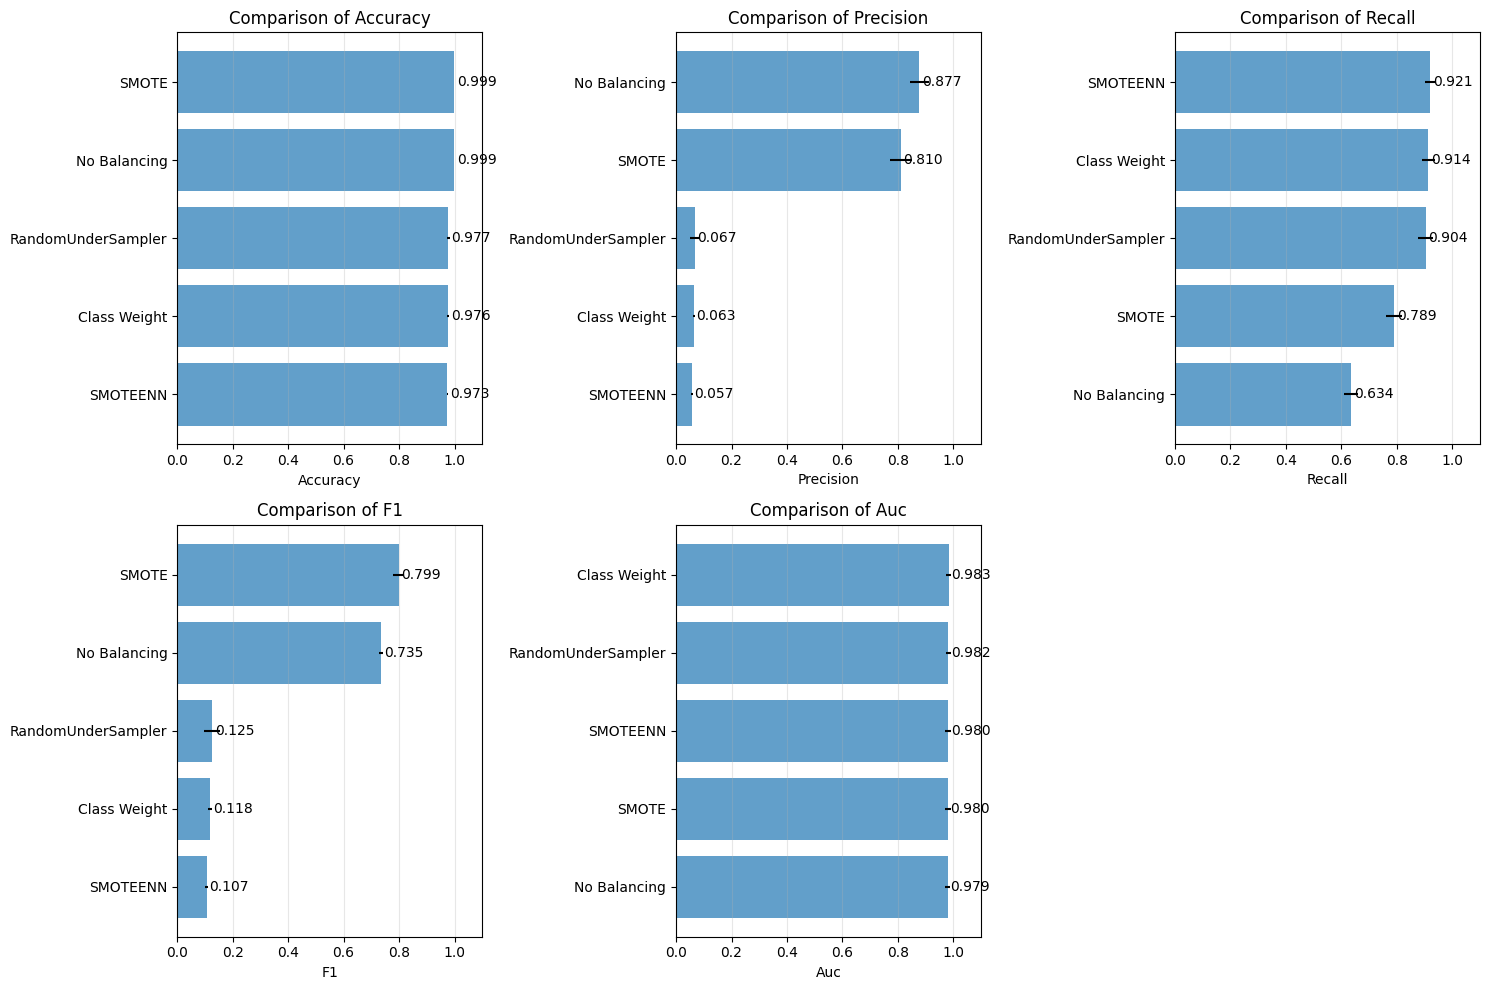


The best method based on Recall is: SMOTEENN

Results of the best method on the test set:
Accuracy: 0.973
Precision: 0.056
Recall: 0.918
F1 Score: 0.106
AUC: 0.971


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("creditcard.csv")

# Separate features and labels
data = df.drop(columns=["Class"])
labels = df["Class"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.to_numpy(), labels.to_numpy(), test_size=0.2, random_state=42, stratify=labels
)

# Scale features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Configurations to test
methods = [
    {"name": "No Balancing", "resampling": None, "class_weight": None},
    {"name": "Class Weight", "resampling": None, "class_weight": "balanced"},
    {"name": "SMOTE", "resampling": "SMOTE", "class_weight": None},
    {"name": "SMOTEENN", "resampling": "SMOTEENN", "class_weight": None},
    {
        "name": "RandomUnderSampler",
        "resampling": "RandomUnderSampler",
        "class_weight": None,
    },
]

results = {
    "method": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1": [],
    "auc": [],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for method in methods:
    print(f"\nEvaluating: {method['name']}")

    method_results = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1": [],
        "auc": [],
    }

    # Manual cross-validation
    for train_idx, val_idx in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        if method["resampling"] is not None:
            if method["resampling"] == "SMOTE":
                resampler = SMOTE(sampling_strategy=0.01, random_state=42)
            elif method["resampling"] == "SMOTEENN":
                resampler = SMOTEENN(random_state=42)
            elif method["resampling"] == "RandomUnderSampler":
                resampler = RandomUnderSampler(sampling_strategy=0.6, random_state=42)

            X_train_fold, y_train_fold = resampler.fit_resample(
                X_train_fold, y_train_fold
            )

        clf = LogisticRegression(
            solver="liblinear", class_weight=method["class_weight"], random_state=42
        )
        clf.fit(X_train_fold, y_train_fold)

        y_proba = clf.predict_proba(X_val_fold)[:, 1]
        y_pred = (y_proba >= 0.5).astype(int)

        method_results["accuracy"].append(accuracy_score(y_val_fold, y_pred))
        method_results["precision"].append(
            precision_score(y_val_fold, y_pred, zero_division=0)
        )
        method_results["recall"].append(
            recall_score(y_val_fold, y_pred, zero_division=0)
        )
        method_results["f1"].append(f1_score(y_val_fold, y_pred, zero_division=0))

        fpr, tpr, _ = roc_curve(y_val_fold, y_proba)
        roc_auc = auc(fpr, tpr)
        method_results["auc"].append(roc_auc)

    results["method"].append(method["name"])
    for metric in ["accuracy", "precision", "recall", "f1", "auc"]:
        results[metric].append(method_results[metric])

    print("Cross-validation results:")
    for metric in ["accuracy", "precision", "recall", "f1", "auc"]:
        print(
            f"{metric.capitalize()}: {np.mean(method_results[metric]):.3f} ± {np.std(method_results[metric]):.3f}"
        )

results_df = pd.DataFrame(
    {
        "method": results["method"],
        "accuracy_mean": [np.mean(acc) for acc in results["accuracy"]],
        "precision_mean": [np.mean(prec) for prec in results["precision"]],
        "recall_mean": [np.mean(rec) for rec in results["recall"]],
        "f1_mean": [np.mean(f1) for f1 in results["f1"]],
        "auc_mean": [np.mean(auc_vals) for auc_vals in results["auc"]],
        "accuracy_std": [np.std(acc) for acc in results["accuracy"]],
        "precision_std": [np.std(prec) for prec in results["precision"]],
        "recall_std": [np.std(rec) for rec in results["recall"]],
        "f1_std": [np.std(f1) for f1 in results["f1"]],
        "auc_std": [np.std(auc_vals) for auc_vals in results["auc"]],
    }
)

print("\nSummary of results:")
print(
    results_df[
        [
            "method",
            "accuracy_mean",
            "precision_mean",
            "recall_mean",
            "f1_mean",
            "auc_mean",
        ]
    ]
)

plt.figure(figsize=(15, 10))
for i, metric in enumerate(["accuracy", "precision", "recall", "f1", "auc"]):
    plt.subplot(2, 3, i + 1)
    means = [np.mean(results[metric][j]) for j in range(len(methods))]
    stds = [np.std(results[metric][j]) for j in range(len(methods))]

    idx = np.argsort(means)
    sorted_methods = [results["method"][i] for i in idx]
    sorted_means = [means[i] for i in idx]
    sorted_stds = [stds[i] for i in idx]

    bars = plt.barh(sorted_methods, sorted_means, xerr=sorted_stds, alpha=0.7)

    for i, bar in enumerate(bars):
        plt.text(
            bar.get_width() + 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{sorted_means[i]:.3f}",
            va="center",
        )

    plt.xlabel(f"{metric.capitalize()}")
    plt.title(f"Comparison of {metric.capitalize()}")
    plt.xlim(0, 1.1)
    plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze the best method on the test set
best_method_idx = results_df["recall_mean"].idxmax()  
best_method = methods[best_method_idx]
print(f"\nThe best method based on Recall is: {best_method['name']}")

X_train_best, y_train_best = X_train.copy(), y_train.copy()

if best_method["resampling"] is not None:
    if best_method["resampling"] == "SMOTE":
        resampler = SMOTE(sampling_strategy=0.01, random_state=42)
    elif best_method["resampling"] == "SMOTEENN":
        resampler = SMOTEENN(random_state=42)
    elif best_method["resampling"] == "RandomUnderSampler":
        resampler = RandomUnderSampler(sampling_strategy=0.6, random_state=42)

    X_train_best, y_train_best = resampler.fit_resample(X_train_best, y_train_best)

clf_best = LogisticRegression(
    solver="liblinear", class_weight=best_method["class_weight"], random_state=42
)
clf_best.fit(X_train_best, y_train_best)

# Evaluate on the test set
y_proba = clf_best.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

print("\nResults of the best method on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.3f}")
print(f"Recall: {recall_score(y_test, y_pred, zero_division=0):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred, zero_division=0):.3f}")
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")


- Dado que el problema es de detección de fraude, el objetivo principal es maximizar el recall (capturar la mayor cantidad de fraudes posibles) sin sacrificar demasiado la precisión (evitar falsos positivos). Además, el F1-score es una métrica importante para equilibrar ambas. 
- Como se ha explicado anteriormente, los métodos de undersampling han sido configurados para eliminar muchos datos (ratio de 0.6) y los de oversampling para generar pocos (ratio de 0.01), dado que eliminar datos de la clase mayoritaria es bastante menos peligroso que generar datos sintéticos en masa. Hemos visto que generar solo unos pocos es capaz de cambiar la frontera de decisión, en ese sentido esta comparación ha sido sesgada, ya que no veía coherente comparar entre métodos de sampling con igual ratio, ya que son dos métodos completamente distintos y con implicaciones distintas.
- SMOTE es el método más equilibrado:
    - Tiene un recall alto (0.789), lo que significa que captura una buena proporción de fraudes.
    - Mantiene una precisión aceptable (0.810), lo que reduce los falsos positivos.
    - Tiene el mejor F1-score (0.799) entre todos los métodos.
    - Su AUC es comparable a los demás métodos.
- Aunque Class Weight, SMOTEENN y RandomUnderSampler tienen un recall más alto, su precisión es extremadamente baja (menos de 0.07), lo que resultaría en demasiados falsos positivos, algo que puede ser costoso en un sistema de detección de fraude.

## References

Some advanced topics are covered in these links:

- [Class Imbalance: Random Sampling and Data Augmentation with Imbalanced-Learn](https://towardsdatascience.com/class-imbalance-random-sampling-and-data-augmentation-with-imbalanced-learn-63f3a92ef04a)
- [SMOTE: Synthetic Data Augmentation for Tabular Data](https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc)
- [Methods for dealing with imbalanced data](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)
- [Credit card fraud dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- [Threshold moving for imbalanced classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)
- [Tour of evaluation metrics for imbalanced classification](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)
- [Tactics to combat imbalanced classes in Machine Learning](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)